In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from circuits_ttt import *
plt.rcParams.update({'font.size': 14})
from textwrap import wrap

Loading games and labels
Data loading complete
Loading games and labels but excluding equivalent games under symmetry
Data loading complete


In [2]:
base_path = '/home/frarzani/Documents/Berlin/sides/pqc-symmetry/output/cluster_out/epochs/'

## Symmetric case

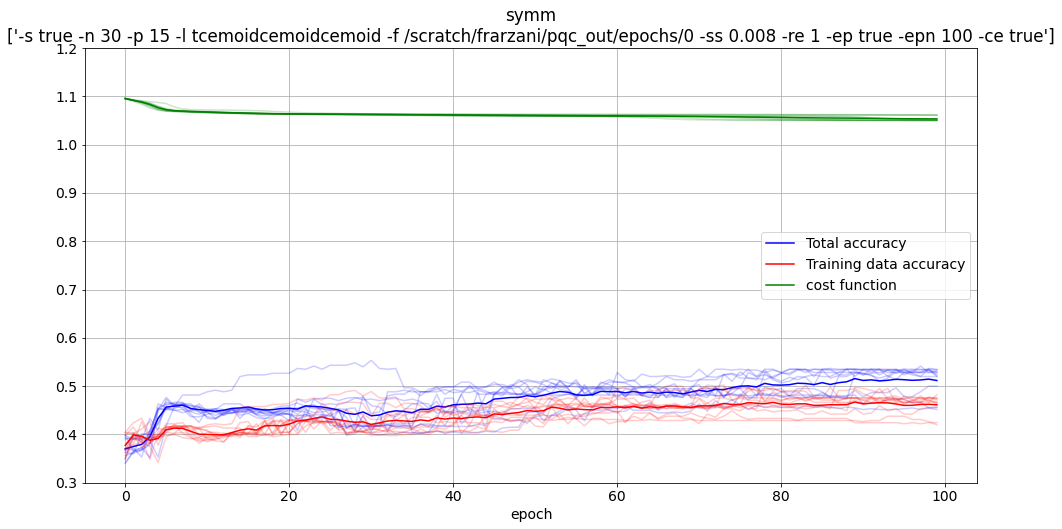

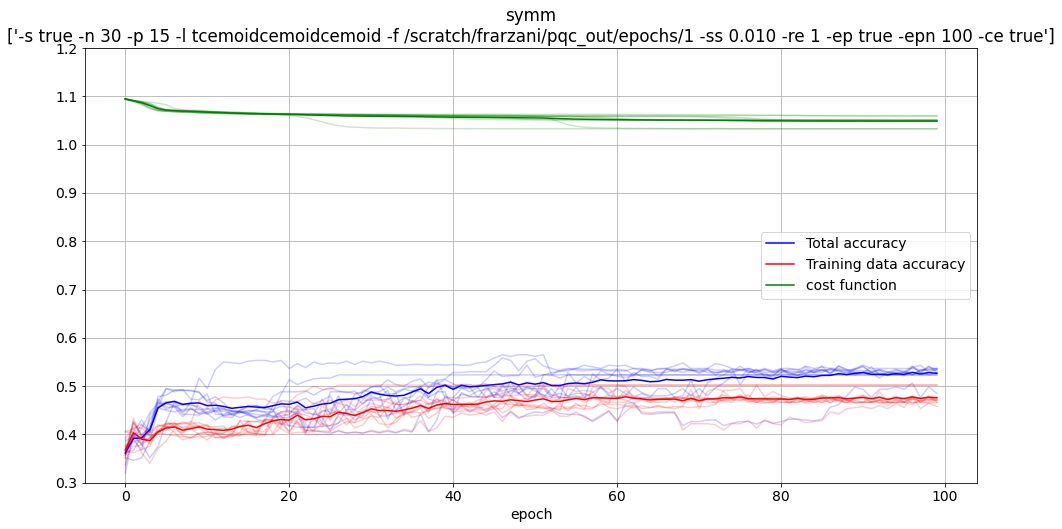

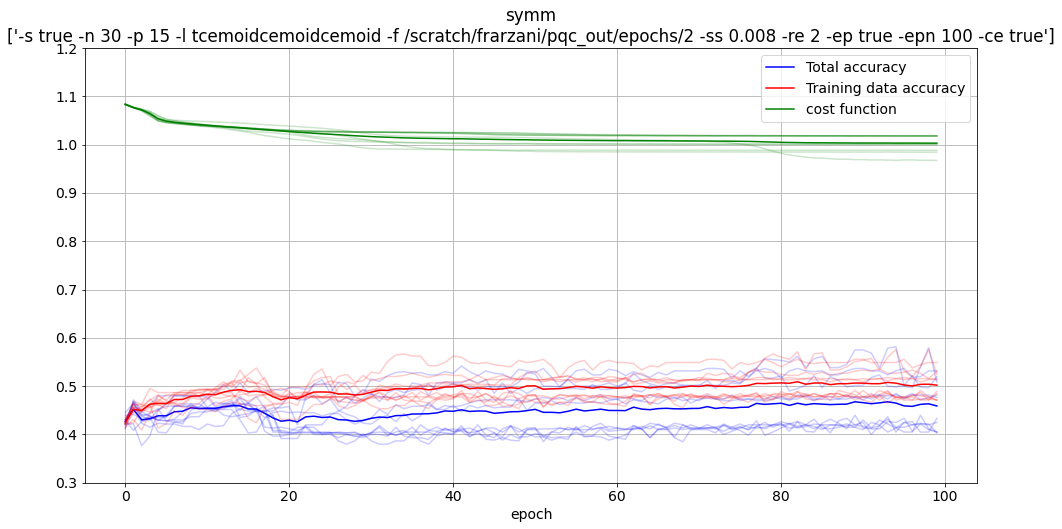

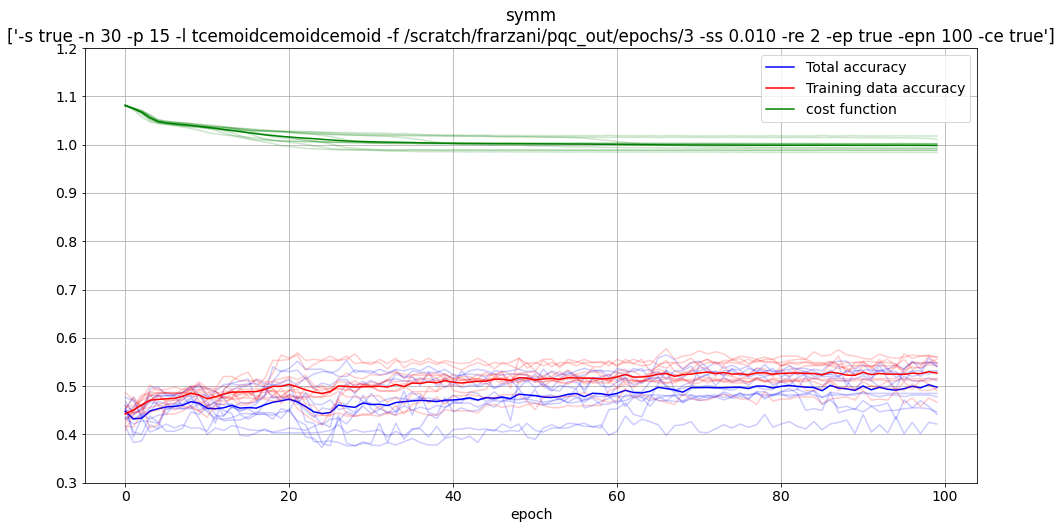

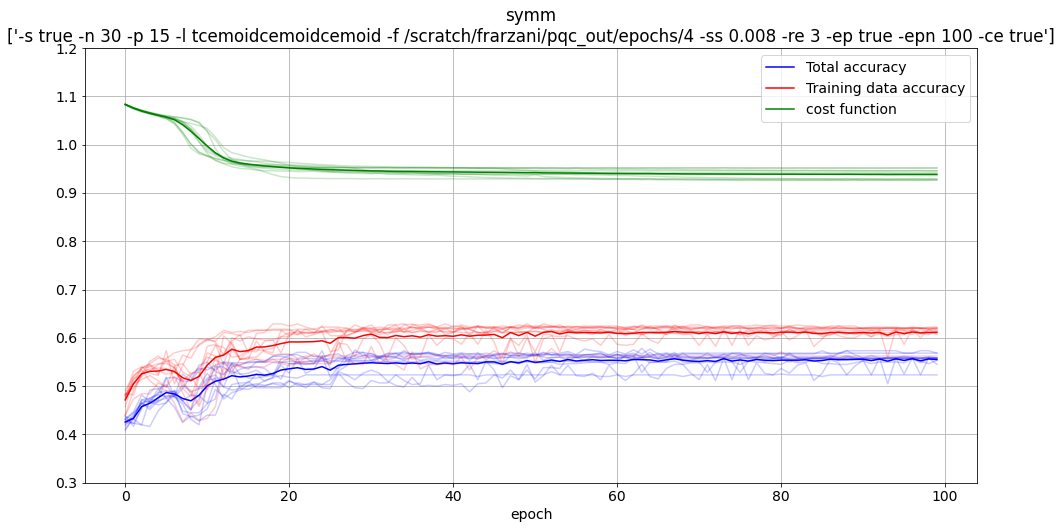

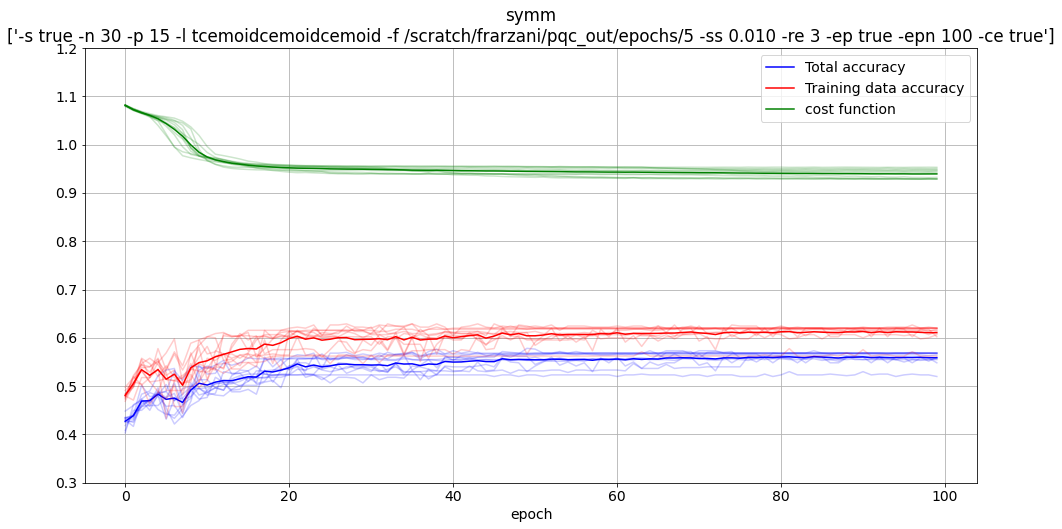

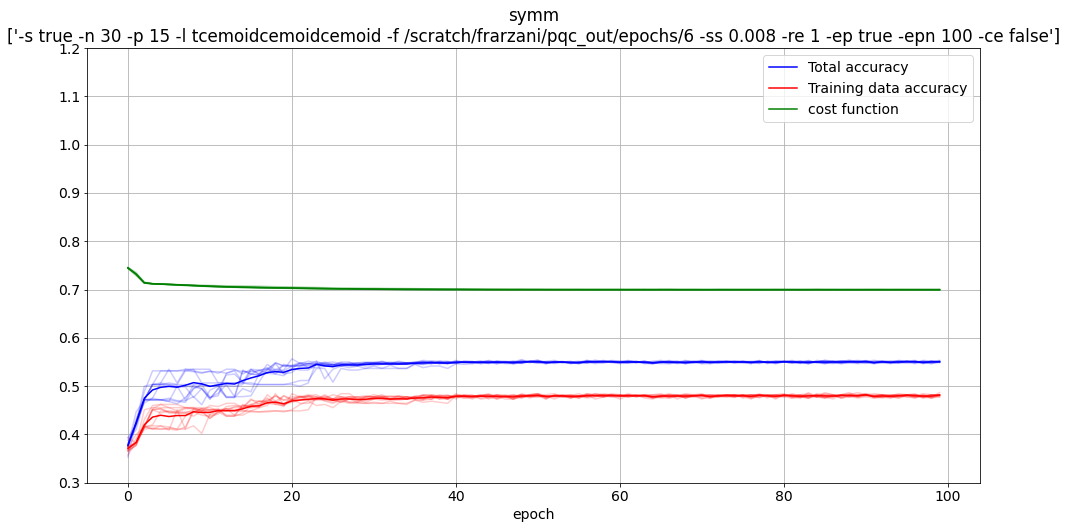

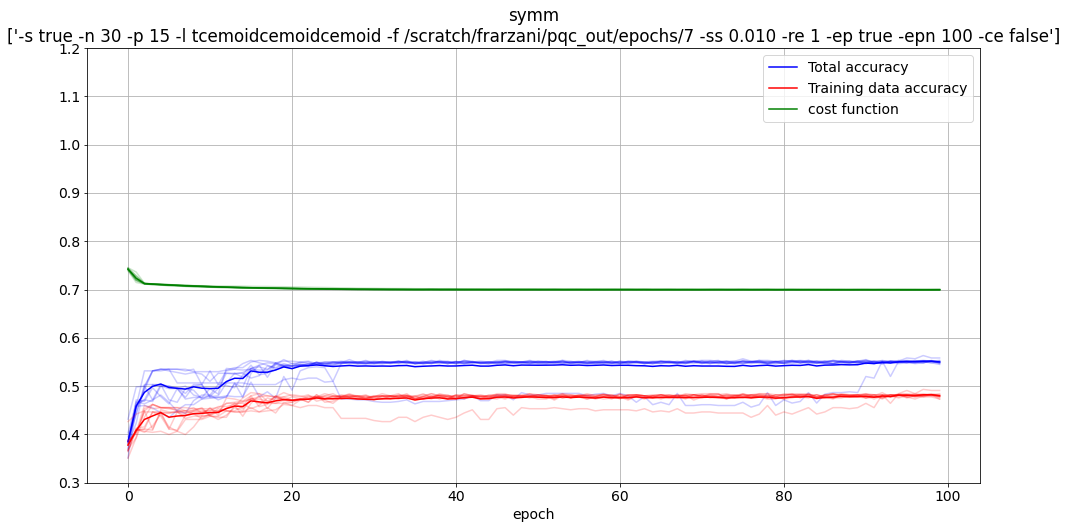

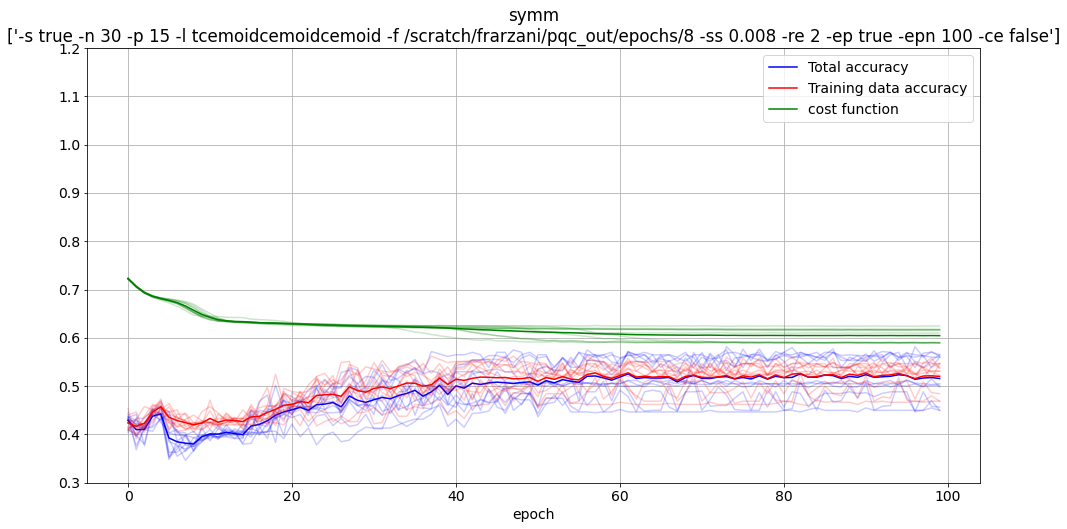

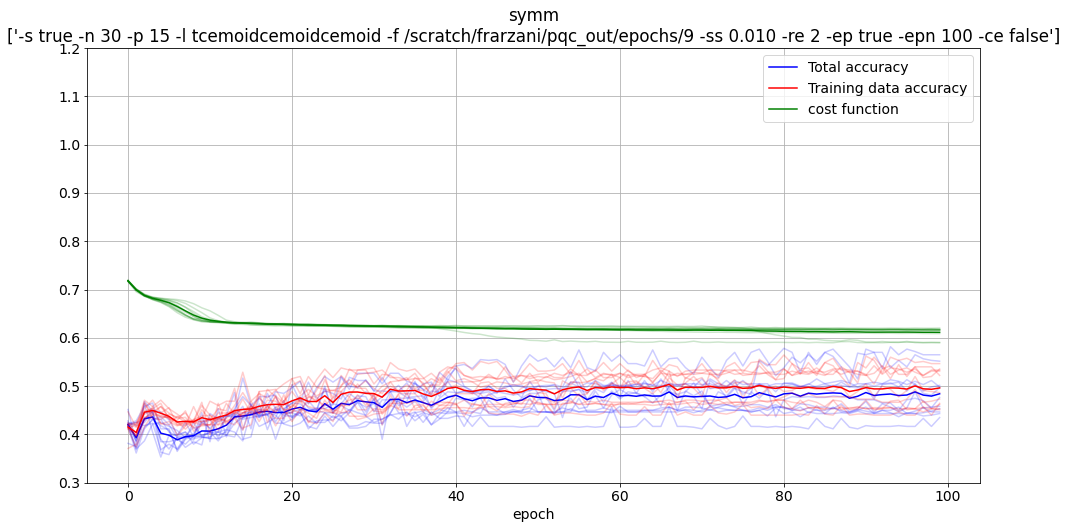

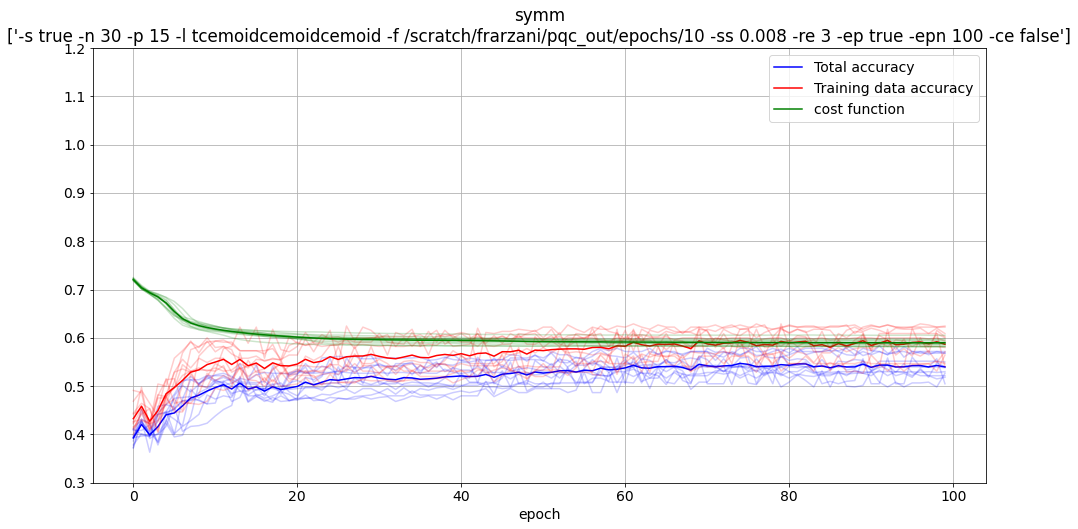

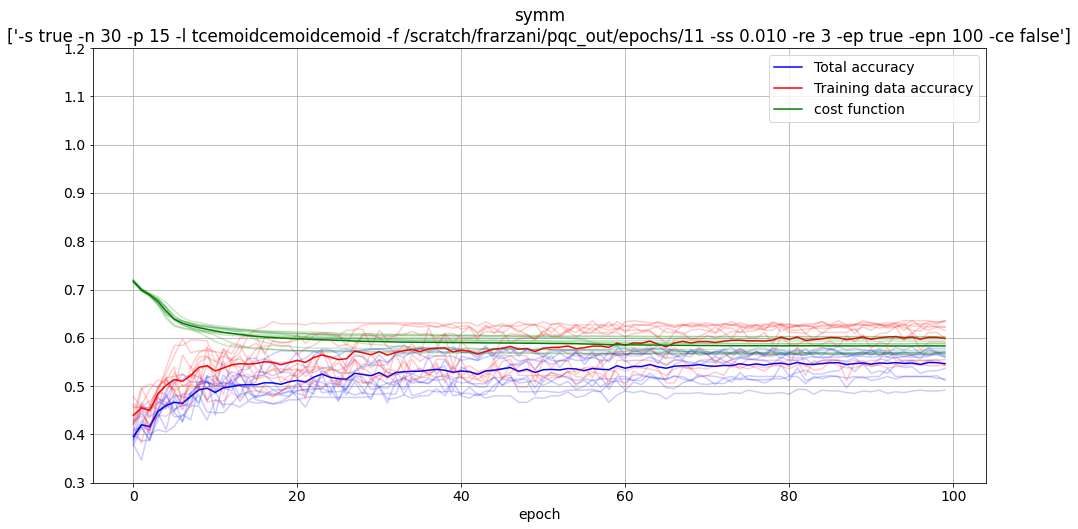

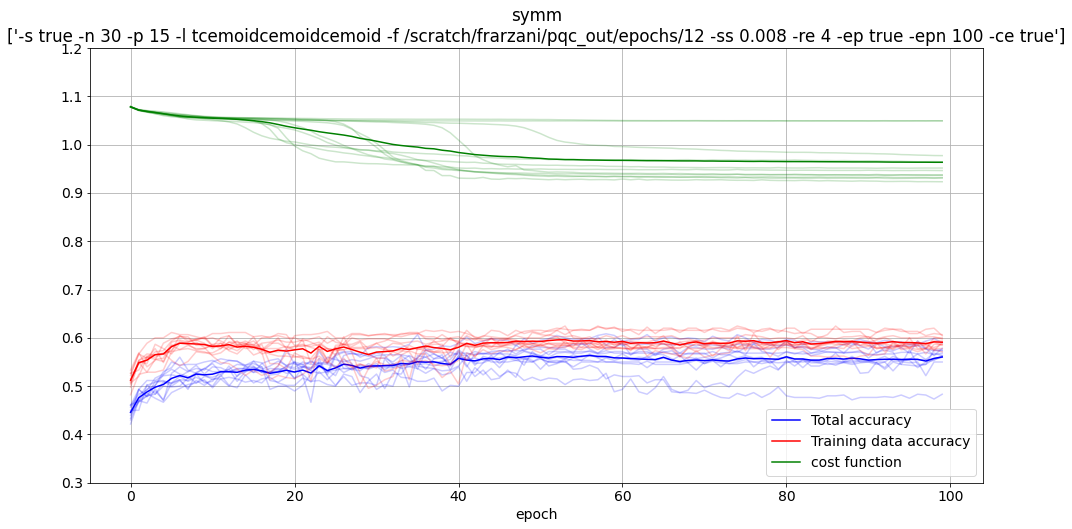

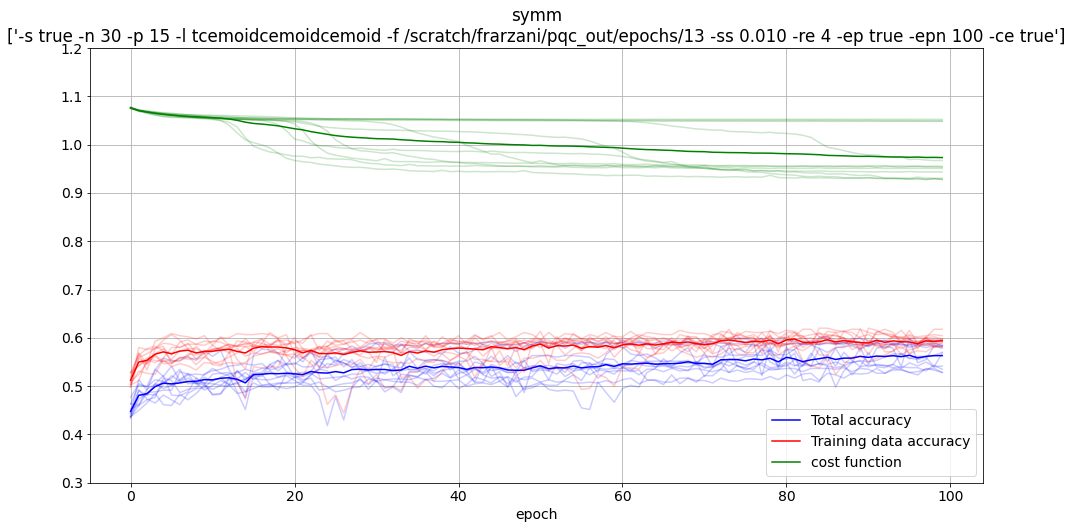

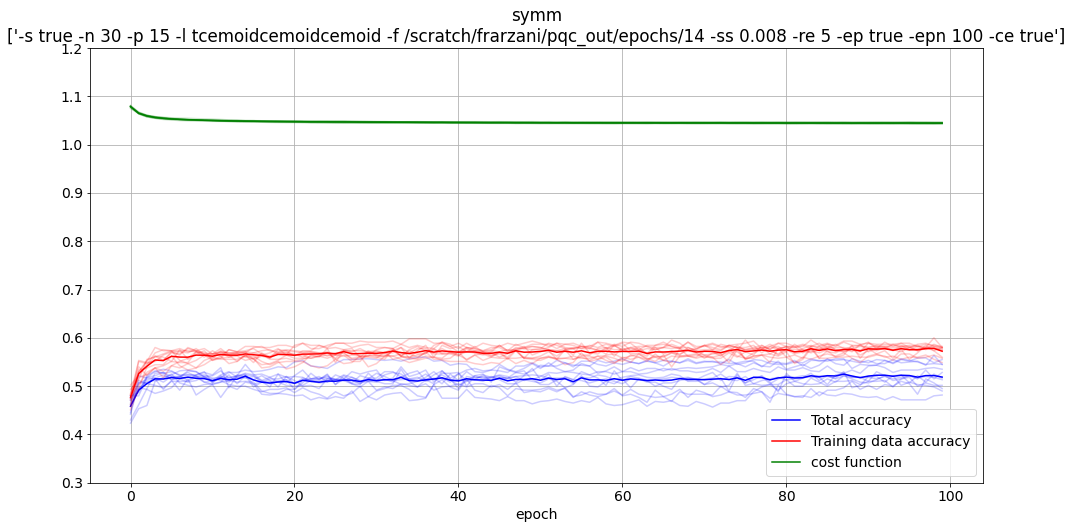

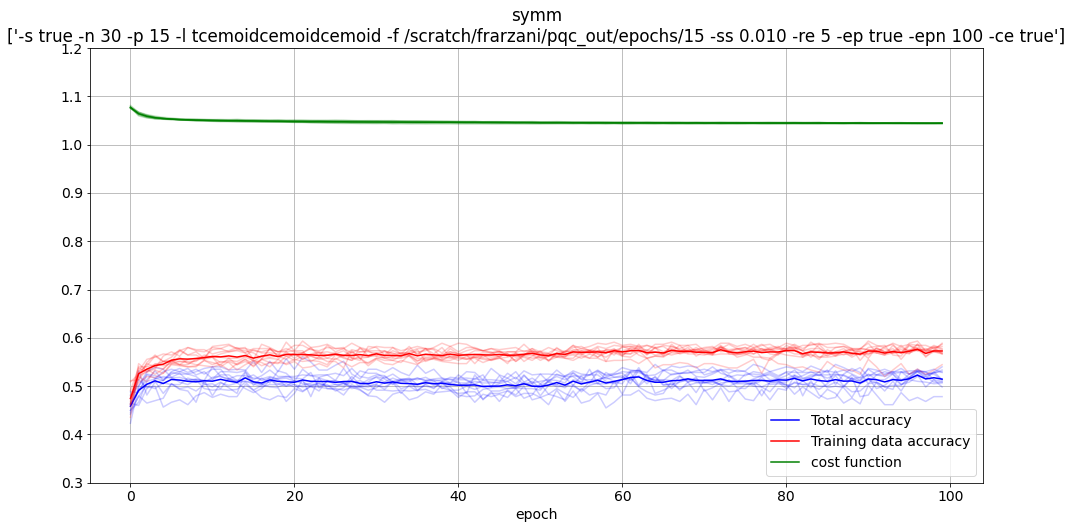

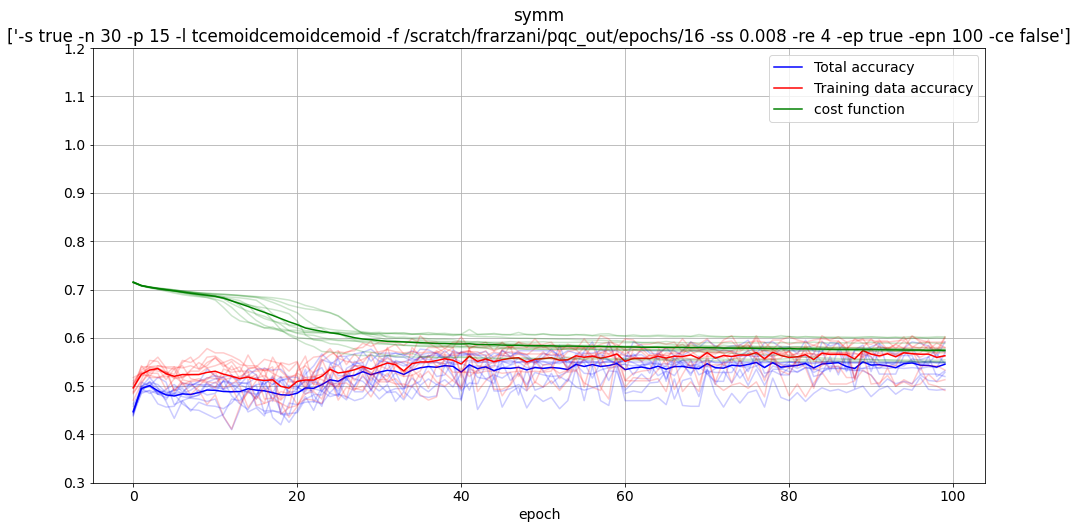

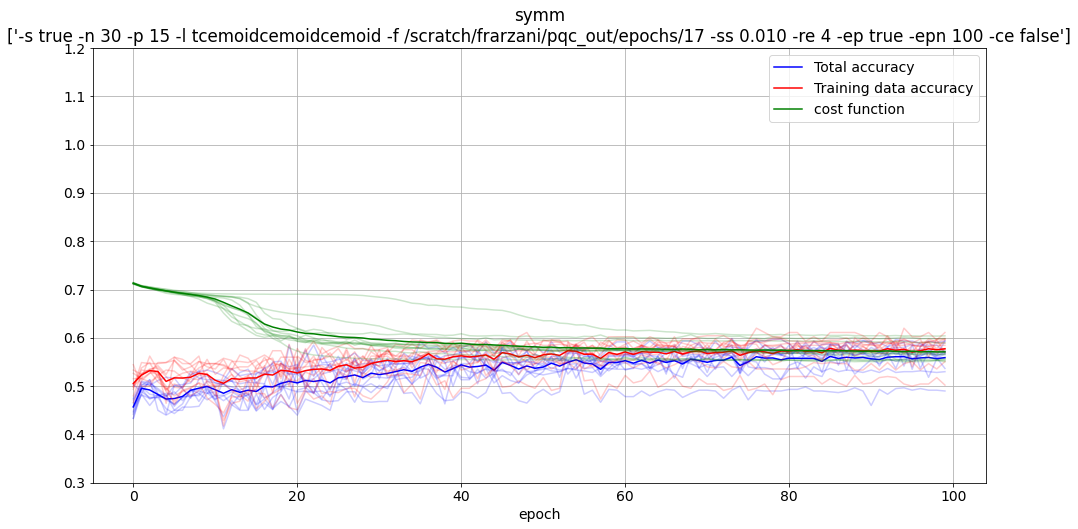

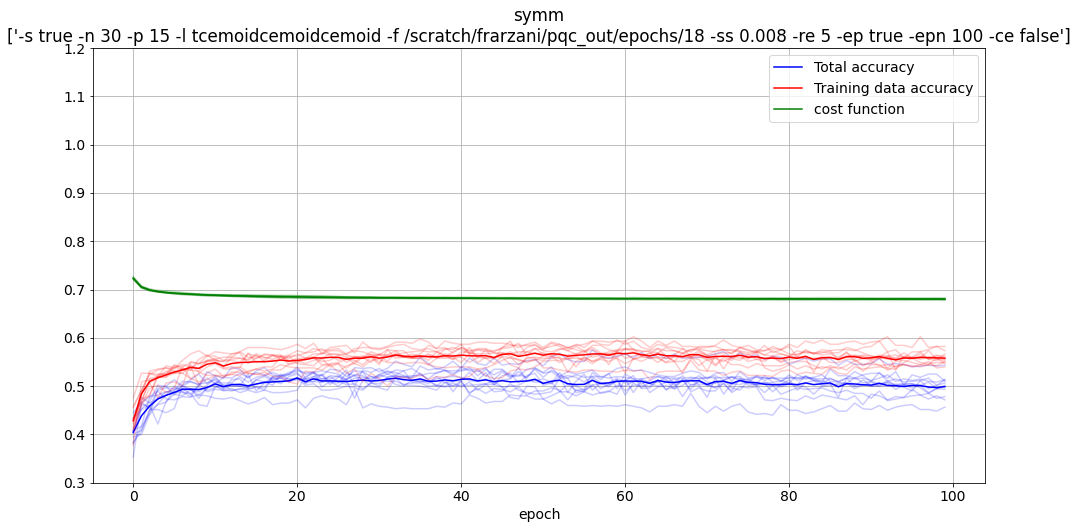

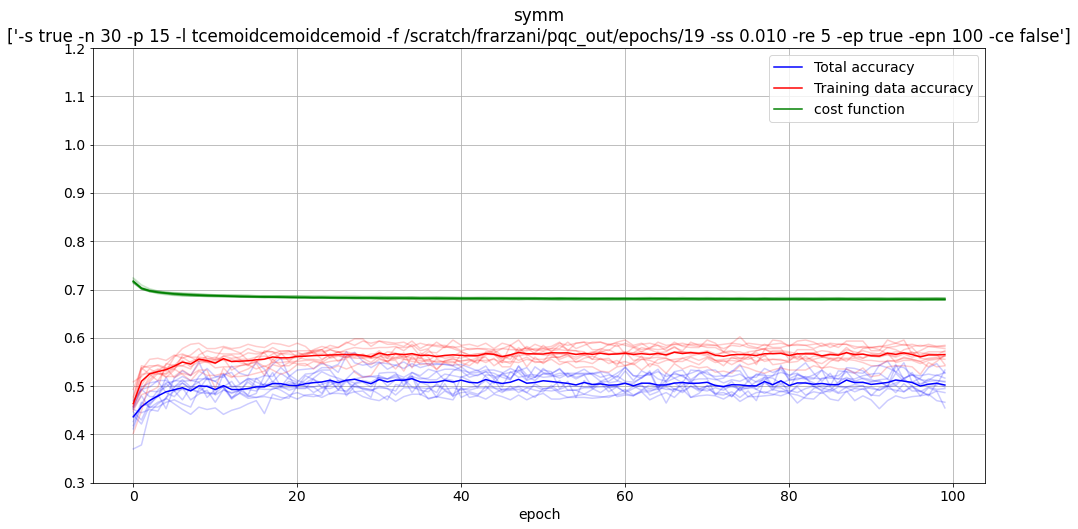

In [3]:
for marker in range(20):
    filenames = next(os.walk(base_path+str(marker)), (None, None, []))[2]
    symmetric = [np.load(base_path + str(marker) + '/' + str(i), allow_pickle=True).item() for i in filenames if i != 'params.txt']
    
    with open(base_path+str(marker)+'/params.txt') as f:
        params = f.readlines()

    plt.figure(figsize=(16, 8))

    epoch_acc = np.array([i['epoch total accuracy'] for i in symmetric])
    epoch_train_acc = np.array([i['epoch accuracy'] for i in symmetric])
    epoch_cost = (torch.tensor([i['epoch cost'] for i in symmetric])).detach().numpy()
    avg_epoch_acc = np.average(epoch_acc, axis=0)
    avg_epoch_train_acc = np.average(epoch_train_acc, axis=0)
    avg_epoch_cost = np.average(epoch_cost, axis=0)
    #plt.ylabel('accuracy')
    plt.xlabel('epoch')
    
    plt.plot([i.trace()/3 for i in avg_epoch_acc], label='Total accuracy',color='blue')
    for j in epoch_acc:
        plt.plot([i.trace()/3 for i in j], color='blue',alpha=0.2)
    
    plt.plot([i.trace()/3 for i in avg_epoch_train_acc], label='Training data accuracy',color='red')
    for j in epoch_train_acc:
        plt.plot([i.trace()/3 for i in j], color='red',alpha=0.2)
        
    plt.plot(avg_epoch_cost, label='cost function',color='green')
    for i in symmetric:
        plt.plot((torch.tensor(i['epoch cost'])).detach().numpy(), color='green',alpha=0.2)
    
    ax = plt.gca()
    ax.set_ylim([0.3, 1.2])
    
    plt.title('symm\n'+str(params))
    plt.legend()
    plt.grid()
    plt.savefig(base_path+'/figs/symm_'+str(marker))
    

## Non symmetric case

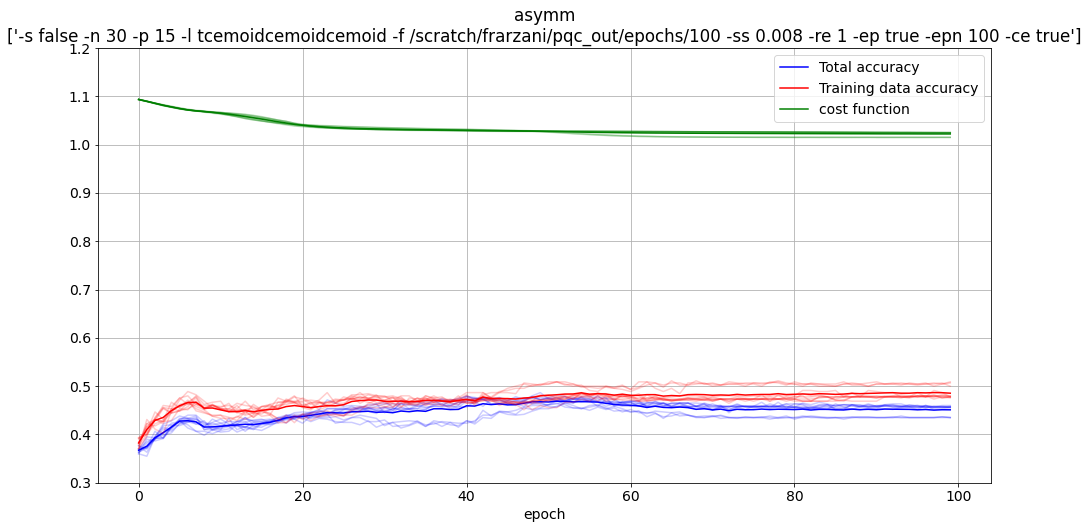

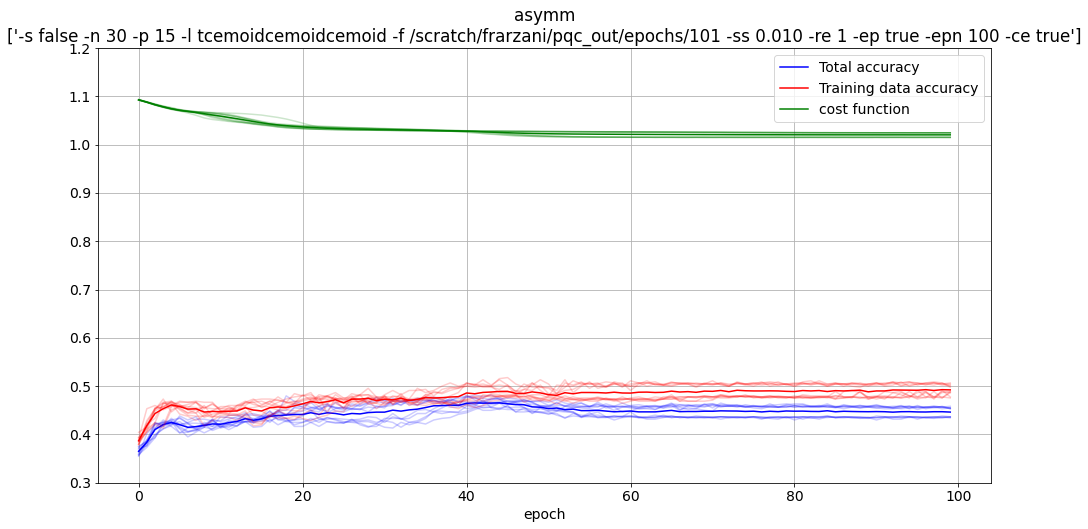

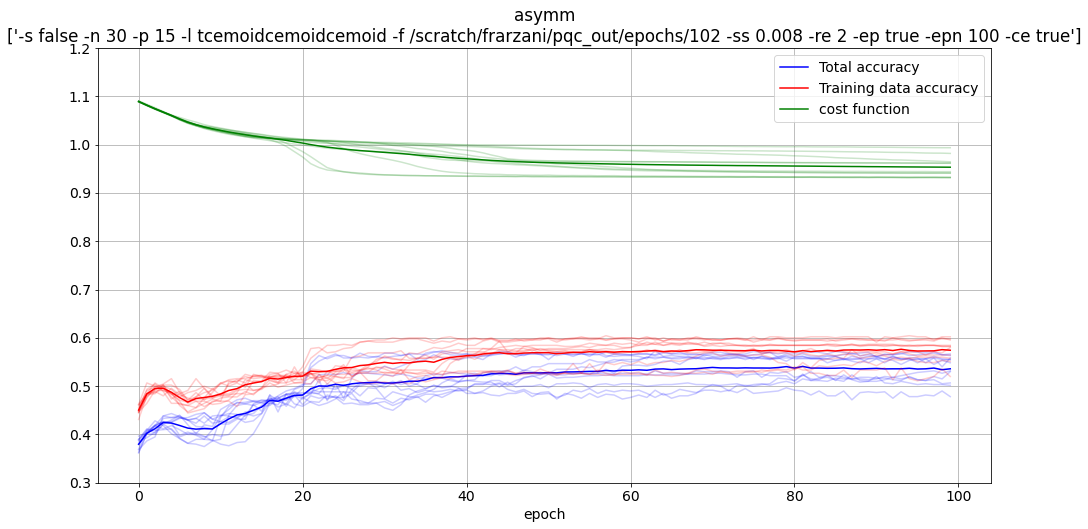

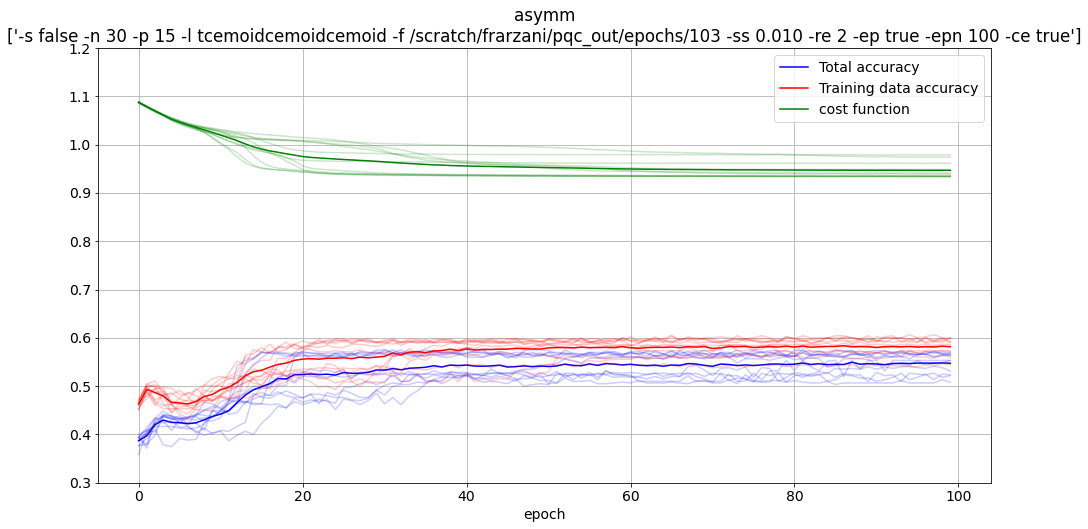

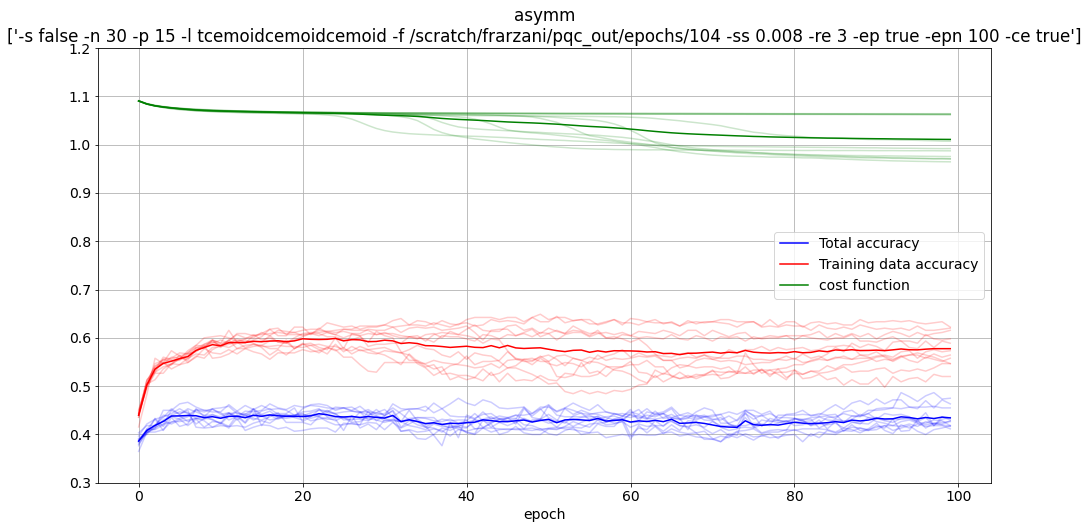

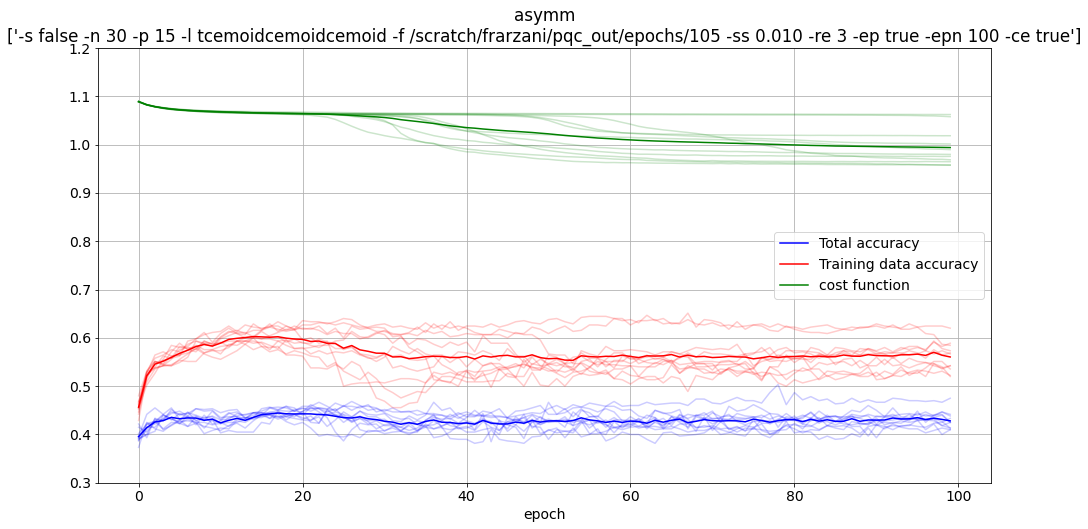

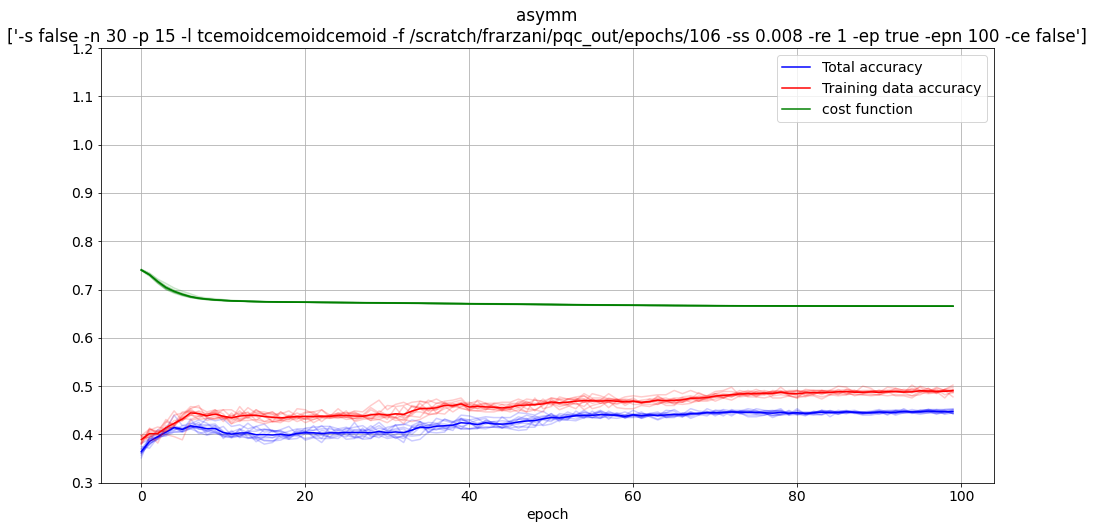

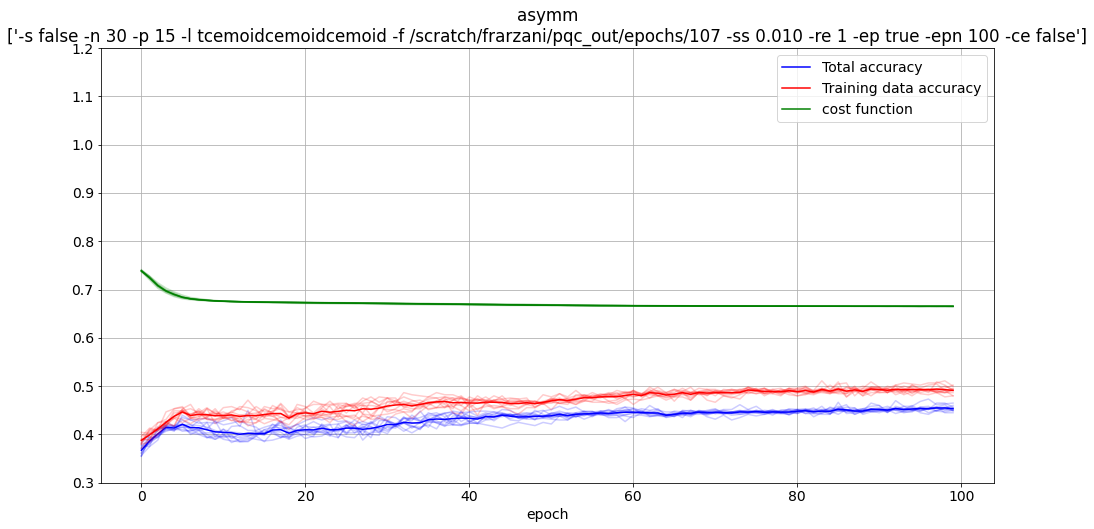

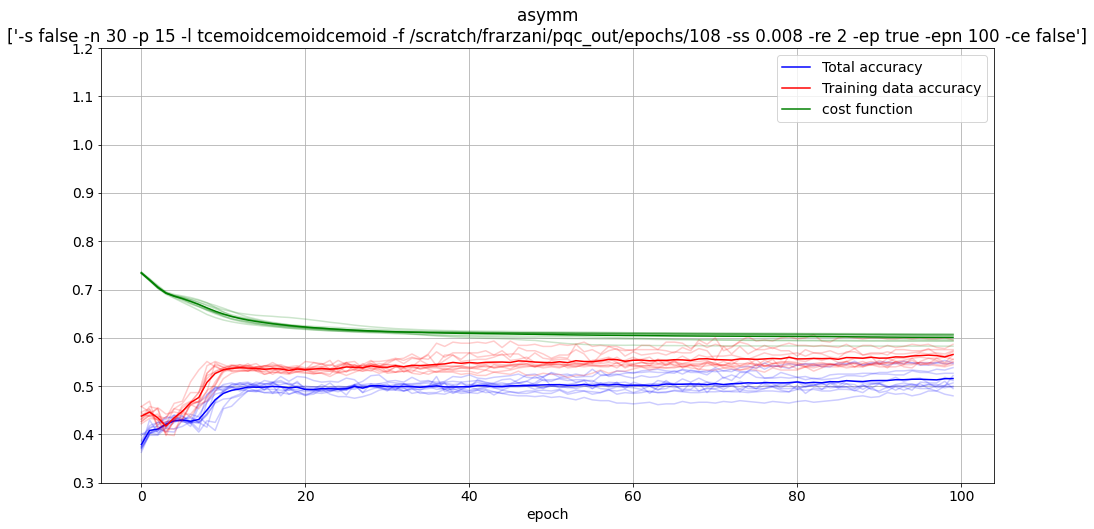

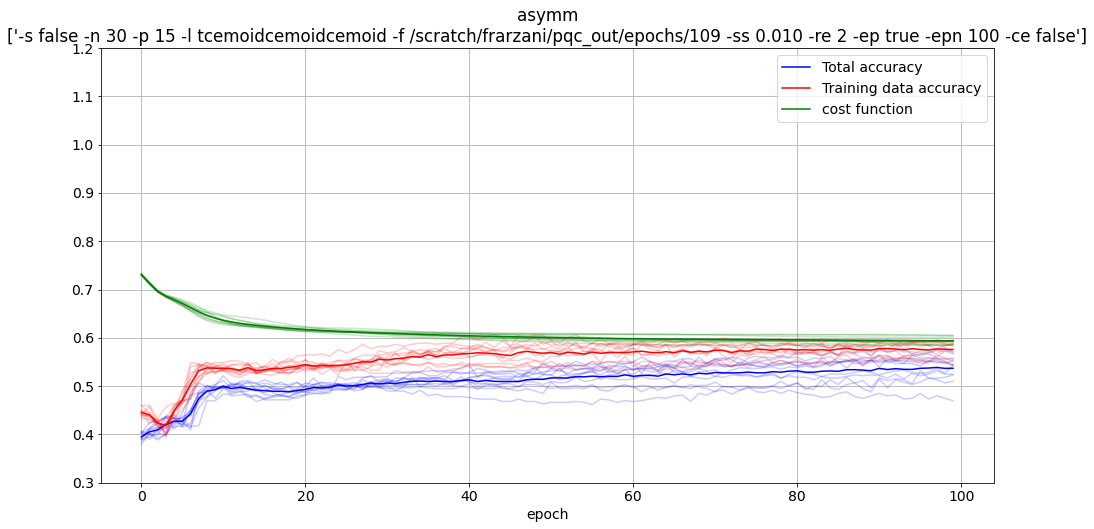

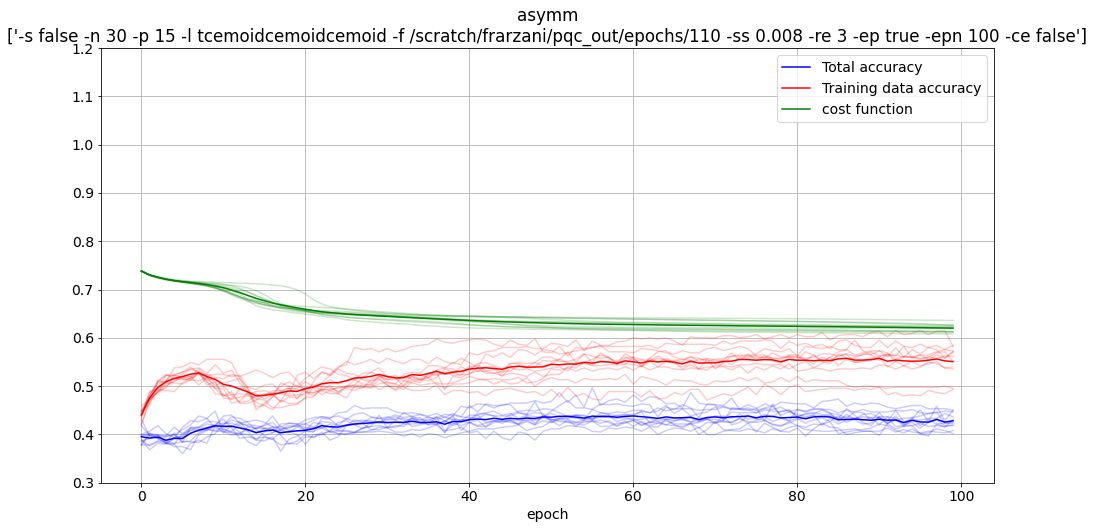

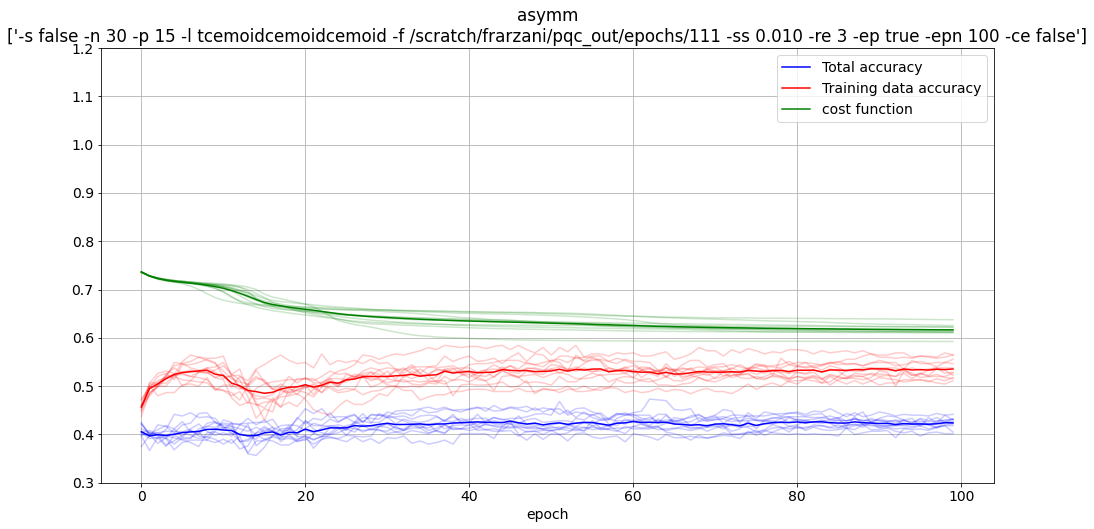

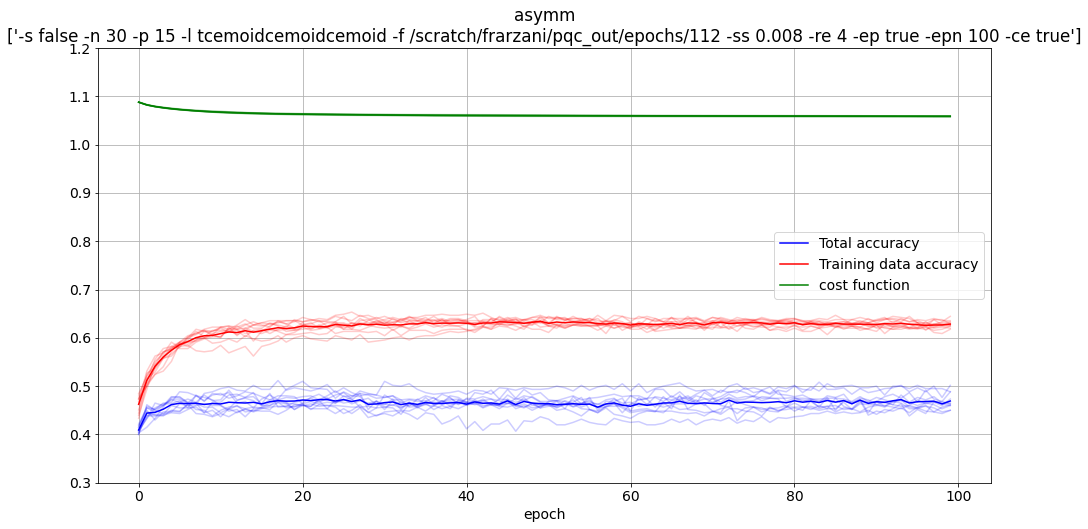

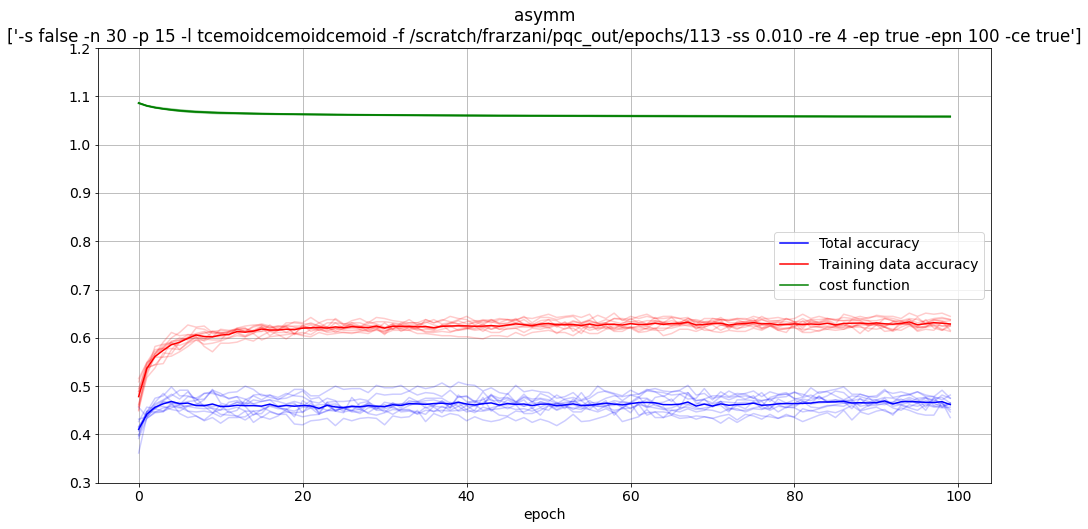

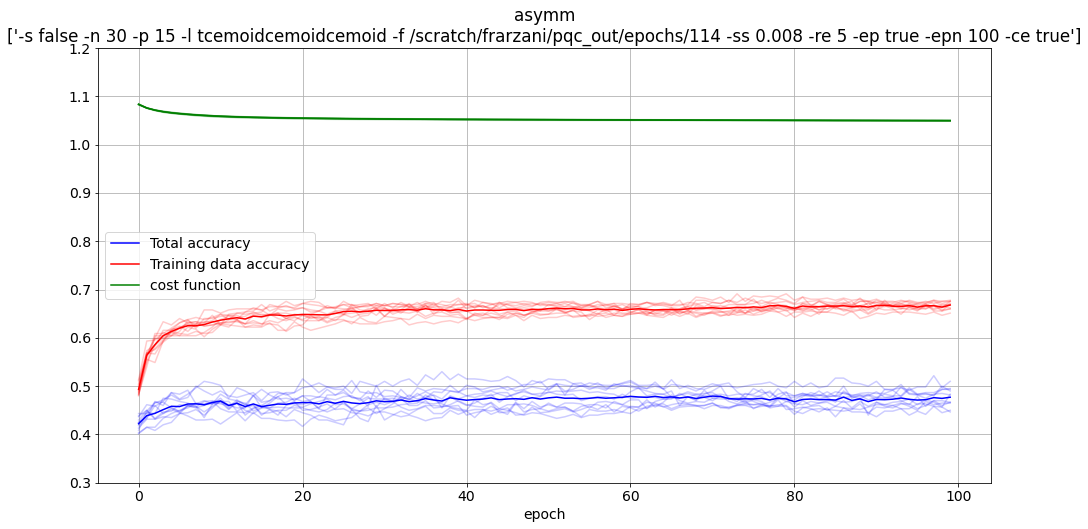

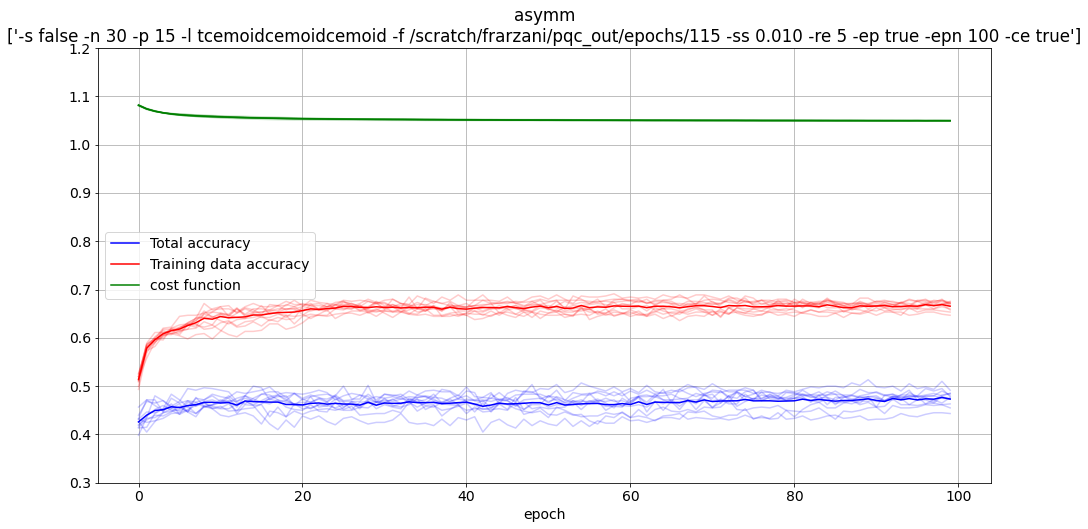

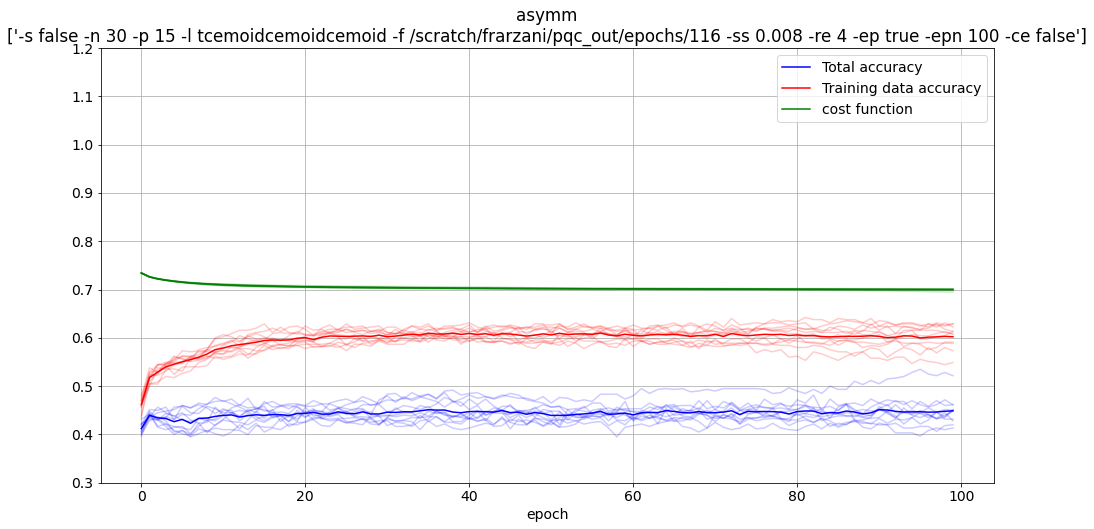

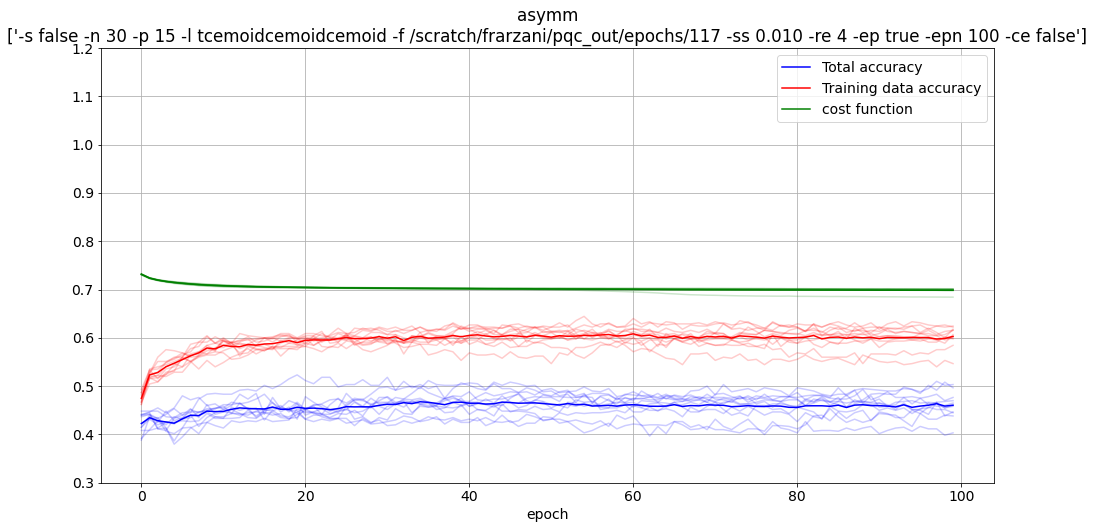

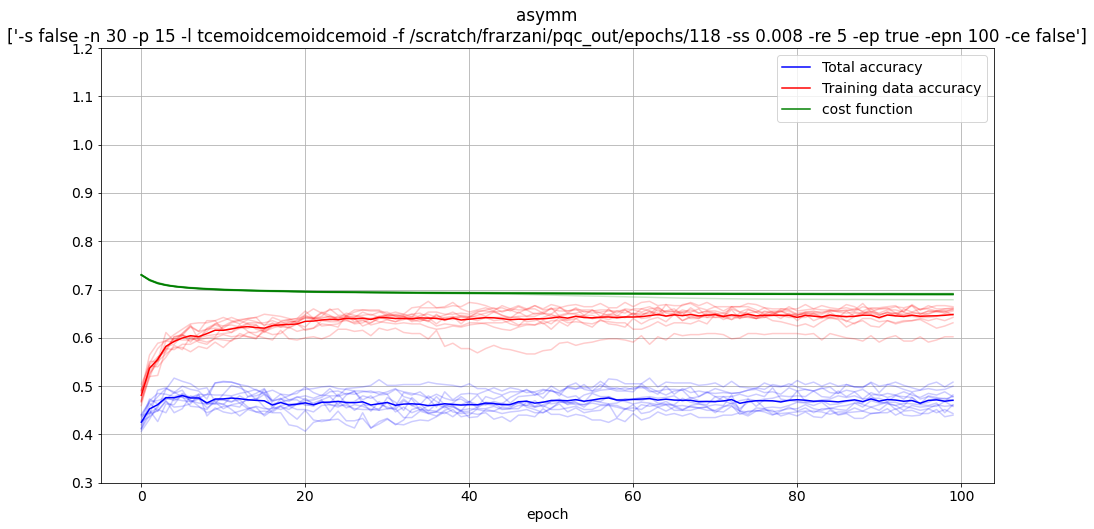

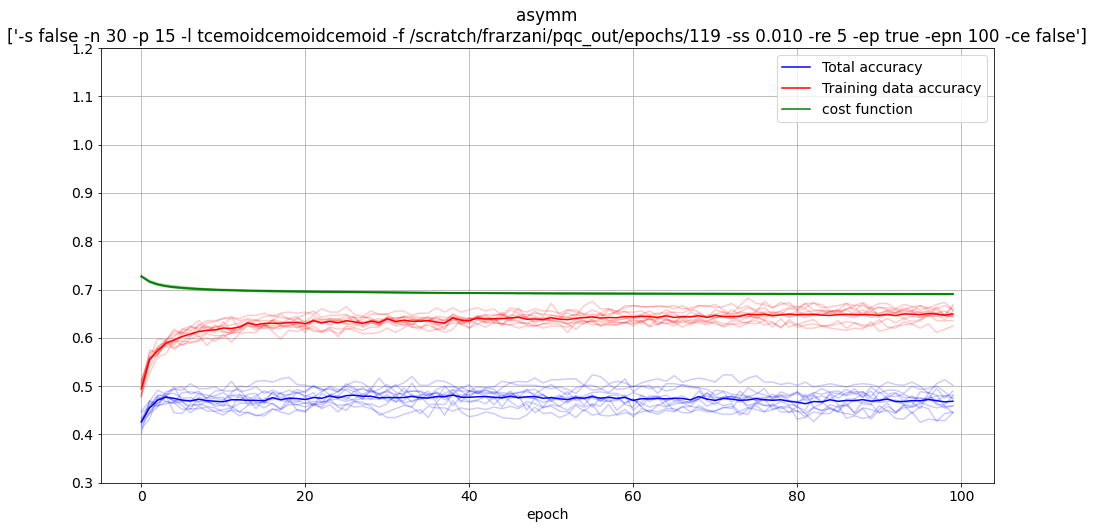

In [4]:
for marker in range(100,120):
    filenames = next(os.walk(base_path+str(marker)), (None, None, []))[2]
    asymmetric = [np.load(base_path + str(marker) + '/' + str(i), allow_pickle=True).item() for i in filenames if i != 'params.txt']
    
    #filenames = next(os.walk(path_to_analyze), (None, None, []))[2]
    #symmetric = [np.load(path_to_analyze + '/' + i, allow_pickle=True).item() for i in filenames if i != 'params.txt']
    
    with open(base_path+str(marker)+'/params.txt') as f:
        params = f.readlines()

    plt.figure(figsize=(16, 8))

    epoch_acc = np.array([i['epoch total accuracy'] for i in asymmetric])
    epoch_train_acc = np.array([i['epoch accuracy'] for i in asymmetric])
    epoch_cost = (torch.tensor([i['epoch cost'] for i in asymmetric])).detach().numpy()
    
    avg_epoch_acc = np.average(epoch_acc, axis=0)
    avg_epoch_train_acc = np.average(epoch_train_acc, axis=0)
    avg_epoch_cost = np.average(epoch_cost, axis=0)
    #plt.ylabel('accuracy')
    plt.xlabel('epoch')
    
    plt.plot([i.trace()/3 for i in avg_epoch_acc], label='Total accuracy',color='blue')
    for j in epoch_acc:
        plt.plot([i.trace()/3 for i in j], color='blue',alpha=0.2)
    
    plt.plot([i.trace()/3 for i in avg_epoch_train_acc], label='Training data accuracy',color='red')
    for j in epoch_train_acc:
        plt.plot([i.trace()/3 for i in j], color='red',alpha=0.2)
        
    plt.plot(avg_epoch_cost, label='cost function',color='green')
    for j in epoch_cost:
        plt.plot(j[:], color='green',alpha=0.2)
        #plt.plot((torch.tensor(i['epoch cost'])).detach().numpy(), color='green',alpha=0.2)
    
    ax = plt.gca()
    ax.set_ylim([0.3, 1.2])
    
    plt.title('asymm\n'+str(params))
    plt.legend()
    plt.grid()
    plt.savefig(base_path+'/figs/asymm_'+str(marker))
    